# 1. 데이터 탐색

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.chdir(r"C:\Users\Gram\Desktop\스배데\데이콘 상점 신용카드 매출 예측 경진대회\data")
df = pd.read_csv('funda_train.csv')

In [3]:
df.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


In [4]:
df.info()
# memory usage: 450.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
store_id            int64
card_id             int64
card_company        object
transacted_date     object
transacted_time     object
installment_term    int64
region              object
type_of_business    object
amount              float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


### 메모리를 위한 데이터 타입 변경

In [5]:
df.store_id = df.store_id.astype(np.int32)
df.card_id = df.card_id.astype(np.int32)
df.card_company = df.card_company.astype('category')  # 카테고리형으로 바꾸면 메모리 용량 감소
df.transacted_date = pd.to_datetime(df.transacted_date + " " + df.transacted_time, format='%Y-%m-%d %H:%M') # transacted_date에 time합침
df.installment_term = df.installment_term.astype(np.int16)
df.region = df.region.astype('category')
df.type_of_business = df.type_of_business.astype('category')

del df['transacted_time']  # transacted_time은 transacted_date에 포함시켰으므로 삭제해도 됨

# amount는 float인데 float은 부동소수점을 공부하면 알겠지만 float을 줄이는 것은 정확도를 줄이는 것임
# float칼럼이 되게 많고, 메모리에 큰 영향을 끼치면 줄여야 하지만 정리해도 메모리 감소에 별 효과없음
# 즉, float은 칼럼이 여러개 있지 않은 이상 잘 건드리지 않음

In [6]:
df.info()
# memory usage: 193.9 MB -> 데이터 타입 관리로 데이터프레임의 메모리 점유율 감소함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 8 columns):
store_id            int32
card_id             int32
card_company        category
transacted_date     datetime64[ns]
installment_term    int16
region              category
type_of_business    category
amount              float64
dtypes: category(3), datetime64[ns](1), float64(1), int16(1), int32(2)
memory usage: 193.9 MB


## 1.1 store_id

In [7]:
df.store_id.value_counts()
# Length: 1967개로 1967개가 존재

1330    9518
1196    9471
1171    9391
710     9347
826     9328
        ... 
1974     429
1240     426
795      231
2119     112
1063      72
Name: store_id, Length: 1967, dtype: int64

In [8]:
df.store_id.max()
# Length: 1967개인데 max가 2136이므로 구멍이 있단 얘기

2136

In [9]:
# 상점별로 대략 몇 건의 기록이 있는지 살펴봄
df.store_id.value_counts().hist()
# 아웃라이어(지나치게 높거나 낮은값)없이 깔끔하게 분포되어 있음

## 1.2 card_id
- 고객에 대한 식별자일 듯

In [10]:
df.card_id.value_counts()
# 거래량이 1로 적은 카드도 있고 거래량이 다양해 보임 -> 히스토그램하면 이쁘지 않게 나올 듯

3820295    2443
3820350    1214
1877306     645
2838881     563
3820294     512
           ... 
1121230       1
1117132       1
1129418       1
1137606       1
3792699       1
Name: card_id, Length: 3950001, dtype: int64

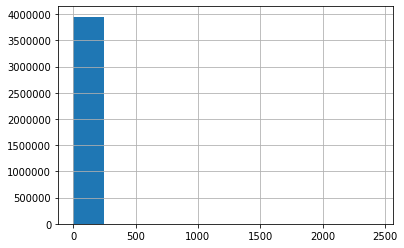

In [11]:
df.card_id.value_counts().hist()
# skewed 비뚤어져있고, 아웃라이어 심각함

## 1.3 card_company

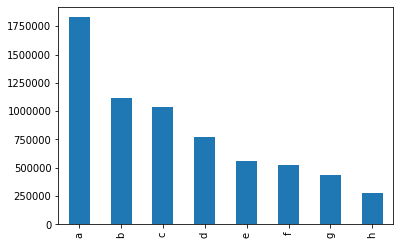

In [12]:
df.card_company.value_counts().plot.bar()

## 1.4 transacted_date

In [13]:
print(f"거래일 시작: {df.transacted_date.min()}")
print(f"거래일 끝: {df.transacted_date.max()}")
# 거래일이 언제부터 발생했는지 확인해 봄
# 약 3년간의 데이터로 이후 3개월간의 매출을 추정하는 대회임을 알 수 있음

거래일 시작: 2016-06-01 00:00:00
거래일 끝: 2019-02-28 23:59:00


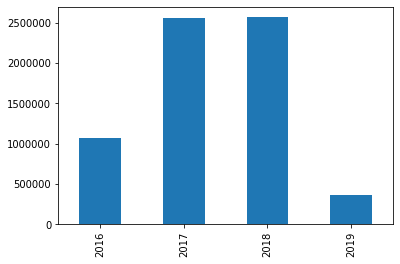

In [14]:
# 3년간의 데이터로 이후 3개월을 예측하는 것이므로 년을 기준으로 시각화
df.transacted_date.dt.year.value_counts().sort_index().plot.bar()
# 데이터가 2016년 6월부터 시작이라 다른 해에 비해 부족함
# 2019년도 2월까지라 다른 해에 비해 데이터가 부족함

## 1.5 region

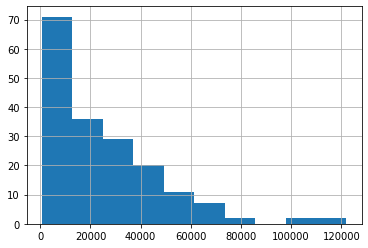

In [15]:
df.region.value_counts().hist()
# 180개라 bar plot으로 시각화하기는 좀 어려움

In [16]:
# 서울이 가장 많지 않을까 싶어 확인
df.region.value_counts()
# 예상과 달리 수원시가 가장 많음
# 서울의 경우는 구별로 쪼깨져있어 거래량이 작게 나옴을 알 수 있음

경기 수원시    122029
충북 청주시    116766
경남 창원시    107147
경남 김해시    100673
경기 평택시     82138
           ...  
경남 거창군      1143
서울 관악구      1037
경남 함안군       878
경북 영천시       849
전남 완도군       681
Name: region, Length: 180, dtype: int64

## 1.6 type_of_business

In [17]:
df.type_of_business.value_counts()
# 음식점업에 치킨전문점이 빠져있음, 한식만 되어 있음 -> 카드사 데이터의 문제
# 카드사 데이터는 업종유형이 매우 까다로움

한식 음식점업                     745905
두발 미용업                      178475
의복 소매업                      158234
기타 주점업                      102413
치킨 전문점                       89277
                             ...  
곡물 및 기타 식량작물 재배업               569
주방용품 및 가정용 유리, 요업 제품 소매업       551
배전반 및 전기 자동제어반 제조업             533
그 외 기타 생활용품 도매업                519
신선식품 및 단순 가공식품 도매업             231
Name: type_of_business, Length: 145, dtype: int64

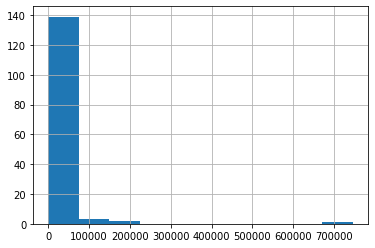

In [18]:
df.type_of_business.value_counts().hist()
# 위의 결과처럼 음식업이 대부분을 차지함

## 1.7 amount

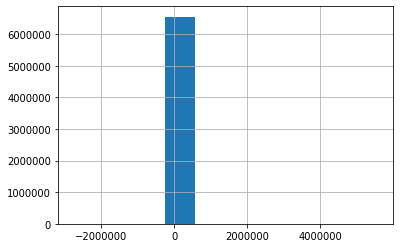

In [19]:
df.amount.hist()
# 아웃라이어가 극단적 -> 로그를 씌워 조정

In [20]:
df[df.amount<0]
# -는 환불금액 -> 다루기 까다로움

,store_id,card_id,card_company,transacted_date,installment_term,region,type_of_business,amount
41,0,40,a,2016-06-10 17:26:00,2,NaN,기타 미용업,-8571.428571
347,0,285,a,2016-08-04 17:52:00,0,NaN,기타 미용업,-1857.142857
731,0,473,g,2016-10-17 10:32:00,0,NaN,기타 미용업,-2000.000000
831,0,230,b,2016-11-03 15:36:00,0,NaN,기타 미용업,-85.714286
944,0,138,a,2016-11-28 13:21:00,0,NaN,기타 미용업,-57.142857
...,...,...,...,...,...,...,...,...
6556242,2136,4663626,b,2019-02-01 21:19:00,0,제주 제주시,기타 주점업,-13428.571429
6556448,2136,4663760,d,2019-02-15 00:46:00,0,제주 제주시,기타 주점업,-6928.571429
6556485,2136,4663779,b,2019-02-18 02:45:00,0,제주 제주시,기타 주점업,-5571.428571
6556489,2136,4663780,d,2019-02-18 21:43:00,0,제주 제주시,기타 주점업,-8571.428571


### 마이너스 금액 발생 원인 파악

In [21]:
df[(df.store_id==0)&(df.card_id==230)]
# 실제로 830과 831, 832번 인덱스를 보면 구매 즉시 취소후 재결제

,store_id,card_id,card_company,transacted_date,installment_term,region,type_of_business,amount
257,0,230,b,2016-07-20 13:17:00,0,NaN,기타 미용업,8571.428571
521,0,230,b,2016-09-05 20:15:00,0,NaN,기타 미용업,11428.571429
830,0,230,b,2016-11-03 15:36:00,0,NaN,기타 미용업,85.714286
831,0,230,b,2016-11-03 15:36:00,0,NaN,기타 미용업,-85.714286
832,0,230,b,2016-11-03 15:37:00,0,NaN,기타 미용업,8571.428571
1089,0,230,b,2016-12-30 15:50:00,0,NaN,기타 미용업,11428.571429
1298,0,230,b,2017-02-16 15:31:00,0,NaN,기타 미용업,8571.428571
1610,0,230,b,2017-04-27 17:35:00,0,NaN,기타 미용업,8571.428571
1738,0,230,b,2017-05-25 18:22:00,0,NaN,기타 미용업,11428.571429
1926,0,230,b,2017-07-06 15:06:00,0,NaN,기타 미용업,8571.428571


In [22]:
df[(df.store_id==0)&(df.card_id==473)]
# 이 경우에는 구매 후 환불한 듯

,store_id,card_id,card_company,transacted_date,installment_term,region,type_of_business,amount
730,0,473,g,2016-10-17 10:30:00,0,NaN,기타 미용업,2000.0
731,0,473,g,2016-10-17 10:32:00,0,NaN,기타 미용업,-2000.0


In [23]:
df[(df.store_id==2136)&(df.card_id==4663626)]
# 이 경우에는 금액을 잘못 결제한 듯

,store_id,card_id,card_company,transacted_date,installment_term,region,type_of_business,amount
6556241,2136,4663626,b,2019-02-01 21:17:00,0,제주 제주시,기타 주점업,13428.571429
6556242,2136,4663626,b,2019-02-01 21:19:00,0,제주 제주시,기타 주점업,-13428.571429
6556243,2136,4663626,b,2019-02-01 21:20:00,0,제주 제주시,기타 주점업,12571.428571


### 마이너스 금액을 제대로 이해하기 위해 로그 적용

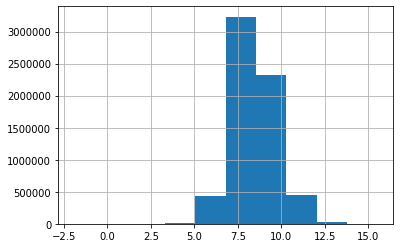

In [24]:
df.loc[df.amount>0, 'amount'].apply(np.log).hist()
# df.amount>0인 이유는 0보다 작거나 같으면 로그가 쓰워지지 않으므로
# 7~10 사이로 몰린 것 확인할 수 있음

In [25]:
# 7인 가격 확인
np.exp(7)
# 1000원에 몰림

1096.6331584284585

In [26]:
# 10인 가격 확인
np.exp(10)  
# 2만원에 몰림

22026.465794806718

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


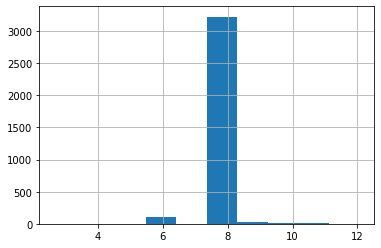

In [27]:
(-df.loc[df.amount-0, 'amount']).apply(np.log).hist()
# 혹시 몰라서 0보다 작음 금액도 확인
# 금액 분포는 0보다 클 때랑 비슷함

In [28]:
df[df.amount==0]
# 금액이 0인 것도 나중에 제외해줘야 함

,store_id,card_id,card_company,transacted_date,installment_term,region,type_of_business,amount
4889632,1605,3478121,h,2016-06-11 13:45:00,0,경남 김해시,NaN,0.0
4889649,1605,3478137,h,2016-06-14 13:30:00,0,경남 김해시,NaN,0.0
4889743,1605,3478221,h,2016-06-28 13:46:00,0,경남 김해시,NaN,0.0
4889852,1605,3478143,h,2016-07-16 11:28:00,0,경남 김해시,NaN,0.0
4890137,1605,3478563,h,2016-08-23 15:46:00,0,경남 김해시,NaN,0.0
...,...,...,...,...,...,...,...,...
4894919,1605,3478871,h,2018-10-31 14:08:00,0,경남 김해시,NaN,0.0
4895176,1605,3478396,h,2018-12-28 13:15:00,0,경남 김해시,NaN,0.0
4895382,1605,3481861,h,2019-02-07 10:03:00,0,경남 김해시,NaN,0.0
4895480,1605,3481328,h,2019-02-23 14:25:00,0,경남 김해시,NaN,0.0


# 2. Baseline model

## 2.1 최근 3개월 데이터 추출
- 최근 3개월치 데이터로 미래 3개월을 예측하기로 함
- 최근 3개월의 매출이 미래 3개월의 매출과 비슷하겠지라고 가정한 상태

In [29]:
# 최근 3개월 데이터 추출
import datetime
recent_df = df[df.transacted_date >= datetime.datetime(2018, 12, 1)]
recent_df

,store_id,card_id,card_company,transacted_date,installment_term,region,type_of_business,amount
4099,0,1677,f,2018-12-01 12:13:00,0,NaN,기타 미용업,7142.857143
4100,0,1416,c,2018-12-01 13:34:00,0,NaN,기타 미용업,2000.000000
4101,0,1678,b,2018-12-01 14:04:00,0,NaN,기타 미용업,2000.000000
4102,0,1679,b,2018-12-01 14:20:00,0,NaN,기타 미용업,2000.000000
4103,0,1644,a,2018-12-01 15:43:00,0,NaN,기타 미용업,1857.142857
...,...,...,...,...,...,...,...,...
6556608,2136,4663855,d,2019-02-28 23:20:00,0,제주 제주시,기타 주점업,-4500.000000
6556609,2136,4663855,d,2019-02-28 23:24:00,0,제주 제주시,기타 주점업,4142.857143
6556610,2136,4663489,a,2019-02-28 23:24:00,0,제주 제주시,기타 주점업,4500.000000
6556611,2136,4663856,d,2019-02-28 23:27:00,0,제주 제주시,기타 주점업,571.428571


In [30]:
# 월 단위로 데이터를 맞춰서 확인 -> 1/17이면 1/1로 맞춤
recent_df.transacted_date.dt.month.value_counts()
# 3개월 데이터인 것 확인

12    206294
1     194513
2     173114
Name: transacted_date, dtype: int64

In [31]:
recent_df.transacted_date.dt.strftime("%Y%m").value_counts() 
# 년도까지 같이 확인

201812    206294
201901    194513
201902    173114
Name: transacted_date, dtype: int64

## 2.3 제출

### 예측 결과

In [32]:
baseline_prediction = recent_df.groupby('store_id').amount.sum().reset_index(name='amount')
baseline_prediction
# 제출형태에 맞게 칼럼 이름 정의 및 형식 변환
# amount가 부동소수점인 float인데 제출할 때 int로 변경해서 제출해야 할지는 의문

,store_id,amount
0,0,2.072714e+06
1,1,3.110000e+05
2,2,1.245429e+06
3,4,2.751000e+06
4,5,9.380857e+05
...,...,...
1945,2132,1.675857e+06
1946,2133,2.002857e+05
1947,2134,3.797143e+05
1948,2135,1.408429e+06


### 제출 형식

In [34]:
os.chdir(r"C:\Users\Gram\Desktop\스배데\데이콘 상점 신용카드 매출 예측 경진대회\data")
submit = pd.read_csv("submission.csv")
submit

,store_id,amount
0,0,0
1,1,0
2,2,0
3,4,0
4,5,0
...,...,...
1962,2132,0
1963,2133,0
1964,2134,0
1965,2135,0


### 예측 결과를 제출 형식에 맞게 변환

In [35]:
submit = submit[['store_id']].merge(baseline_prediction, on='store_id', how='left')
# baseline_prediction에는 1950개인데 실제 제출할 submit은 1967개임 -> 17상점은 폐업하거나 매출이 발생하지 않았을 수 있음
# 따라서 개수를 맞추기 위해 submit의 store_id개수에 맞게 baseline_prediction 데이터를 합침

In [36]:
# 상점명 개수를 맞춘뒤 부족한 amount데이터는 0으로 채워줌
submit.amount = submit.amount.fillna(0)

In [37]:
# submit.sample()에서 확인한 매출량과 같은지 확인
recent_df.loc[recent_df.store_id == 460, 'amount'].sum()

5659643.285714285

### 제출

In [39]:
submit.to_csv(r"C:\Users\Gram\Desktop\스배데\데이콘 상점 신용카드 매출 예측 경진대회\data/baseline_submit.csv", index=False)

**등수 : 48**<br>
**점수 : 821368.34244**